In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import phik
from phik.report import plot_correlation_matrix
from phik import report

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [21]:
df = pd.read_csv('../Data/supermarket_customer_clean.csv')
df.head()

,ID,Age,Age_Category,Education,Marital_Status,Income,Income_Category,Kids,Kidhome,Teenhome,Registered_Year,Registered_Month,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchase,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Acc_Cmp,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntWinesCat,MntFruitsCat,MntMeatProductsCat,MntFishProductsCat,MntSweetProductsCat,MntGoldProdsCat,TotalPurchaseCat,NumDealsCat,NumWebCat,NumCatalogCat,NumStoreCat,NumWebVisitsCat
0,5524,67,3. Old,Graduate,Single,58138.0,3. Upper-Middle,0,0,0,2012,September,635,88,546,172,88,88,1617,3,8,10,4,7,0,0,0,0,0,0,0,1,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Amount Purchases,High Number of Total Purchase,Medium to High Number Purchases,High Number Purchases,High Number Purchases,Medium to Low Number Purchases,Medium to High Number Visit
1,2174,70,3. Old,Graduate,Single,46344.0,2. Lower-Middle,2,1,1,2014,March,11,1,6,2,1,6,27,2,1,1,2,5,0,0,0,0,0,0,0,0,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Amount Purchases,Low Number of Total Purchase,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Low Number Purchases,Medium to Low Number Visit
2,4141,59,2. Elderly,Graduate,Relationship,71613.0,4. Upper,0,0,0,2013,August,426,49,127,111,21,42,776,1,8,2,10,4,0,0,0,0,0,0,0,0,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Number of Total Purchase,Low Number Purchases,High Number Purchases,Medium to Low Number Purchases,High Number Purchases,Medium to Low Number Visit
3,6182,40,1. Adult,Graduate,Relationship,26646.0,1. Lower,1,1,0,2014,February,11,4,20,10,3,5,53,2,2,0,4,6,0,0,0,0,0,0,0,0,Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Medium to Low Amount Purchases,Low Amount Purchases,Low Number of Total Purchase,Medium to Low Number Purchases,Low Number Purchases,Low Number Purchases,Medium to Low Number Purchases,Medium to Low Number Visit
4,5324,43,1. Adult,Post Graduate,Relationship,58293.0,3. Upper-Middle,1,1,0,2014,January,173,43,118,46,27,15,422,5,5,3,6,5,0,0,0,0,0,0,0,0,Medium to Low Amount Purchases,High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to High Amount Purchases,Medium to Low Amount Purchases,Medium to High Number of Total Purchase,High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases,Medium to High Number Purchases,Medium to Low Number Visit


In [22]:
print(f'The number of rows and columns : {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

The number of rows and columns : (2023, 44)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,ID,int64,0.0,False,2023,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Age,int64,0.0,False,56,"[67, 70, 59, 40, 43, 57, 53, 39, 50, 74, 48, 6..."
2,Age_Category,object,0.0,False,3,"[3. Old, 2. Elderly, 1. Adult]"
3,Education,object,0.0,False,3,"[Graduate, Post Graduate, Under Graduate]"
4,Marital_Status,object,0.0,False,2,"[Single, Relationship]"
5,Income,float64,0.0,False,1963,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
6,Income_Category,object,0.0,False,4,"[3. Upper-Middle, 2. Lower-Middle, 4. Upper, 1..."
7,Kids,int64,0.0,False,4,"[0, 2, 1, 3]"
8,Kidhome,int64,0.0,False,3,"[0, 1, 2]"
9,Teenhome,int64,0.0,False,3,"[0, 1, 2]"


interval columns not set, guessing: ['Kidhome', 'Teenhome']


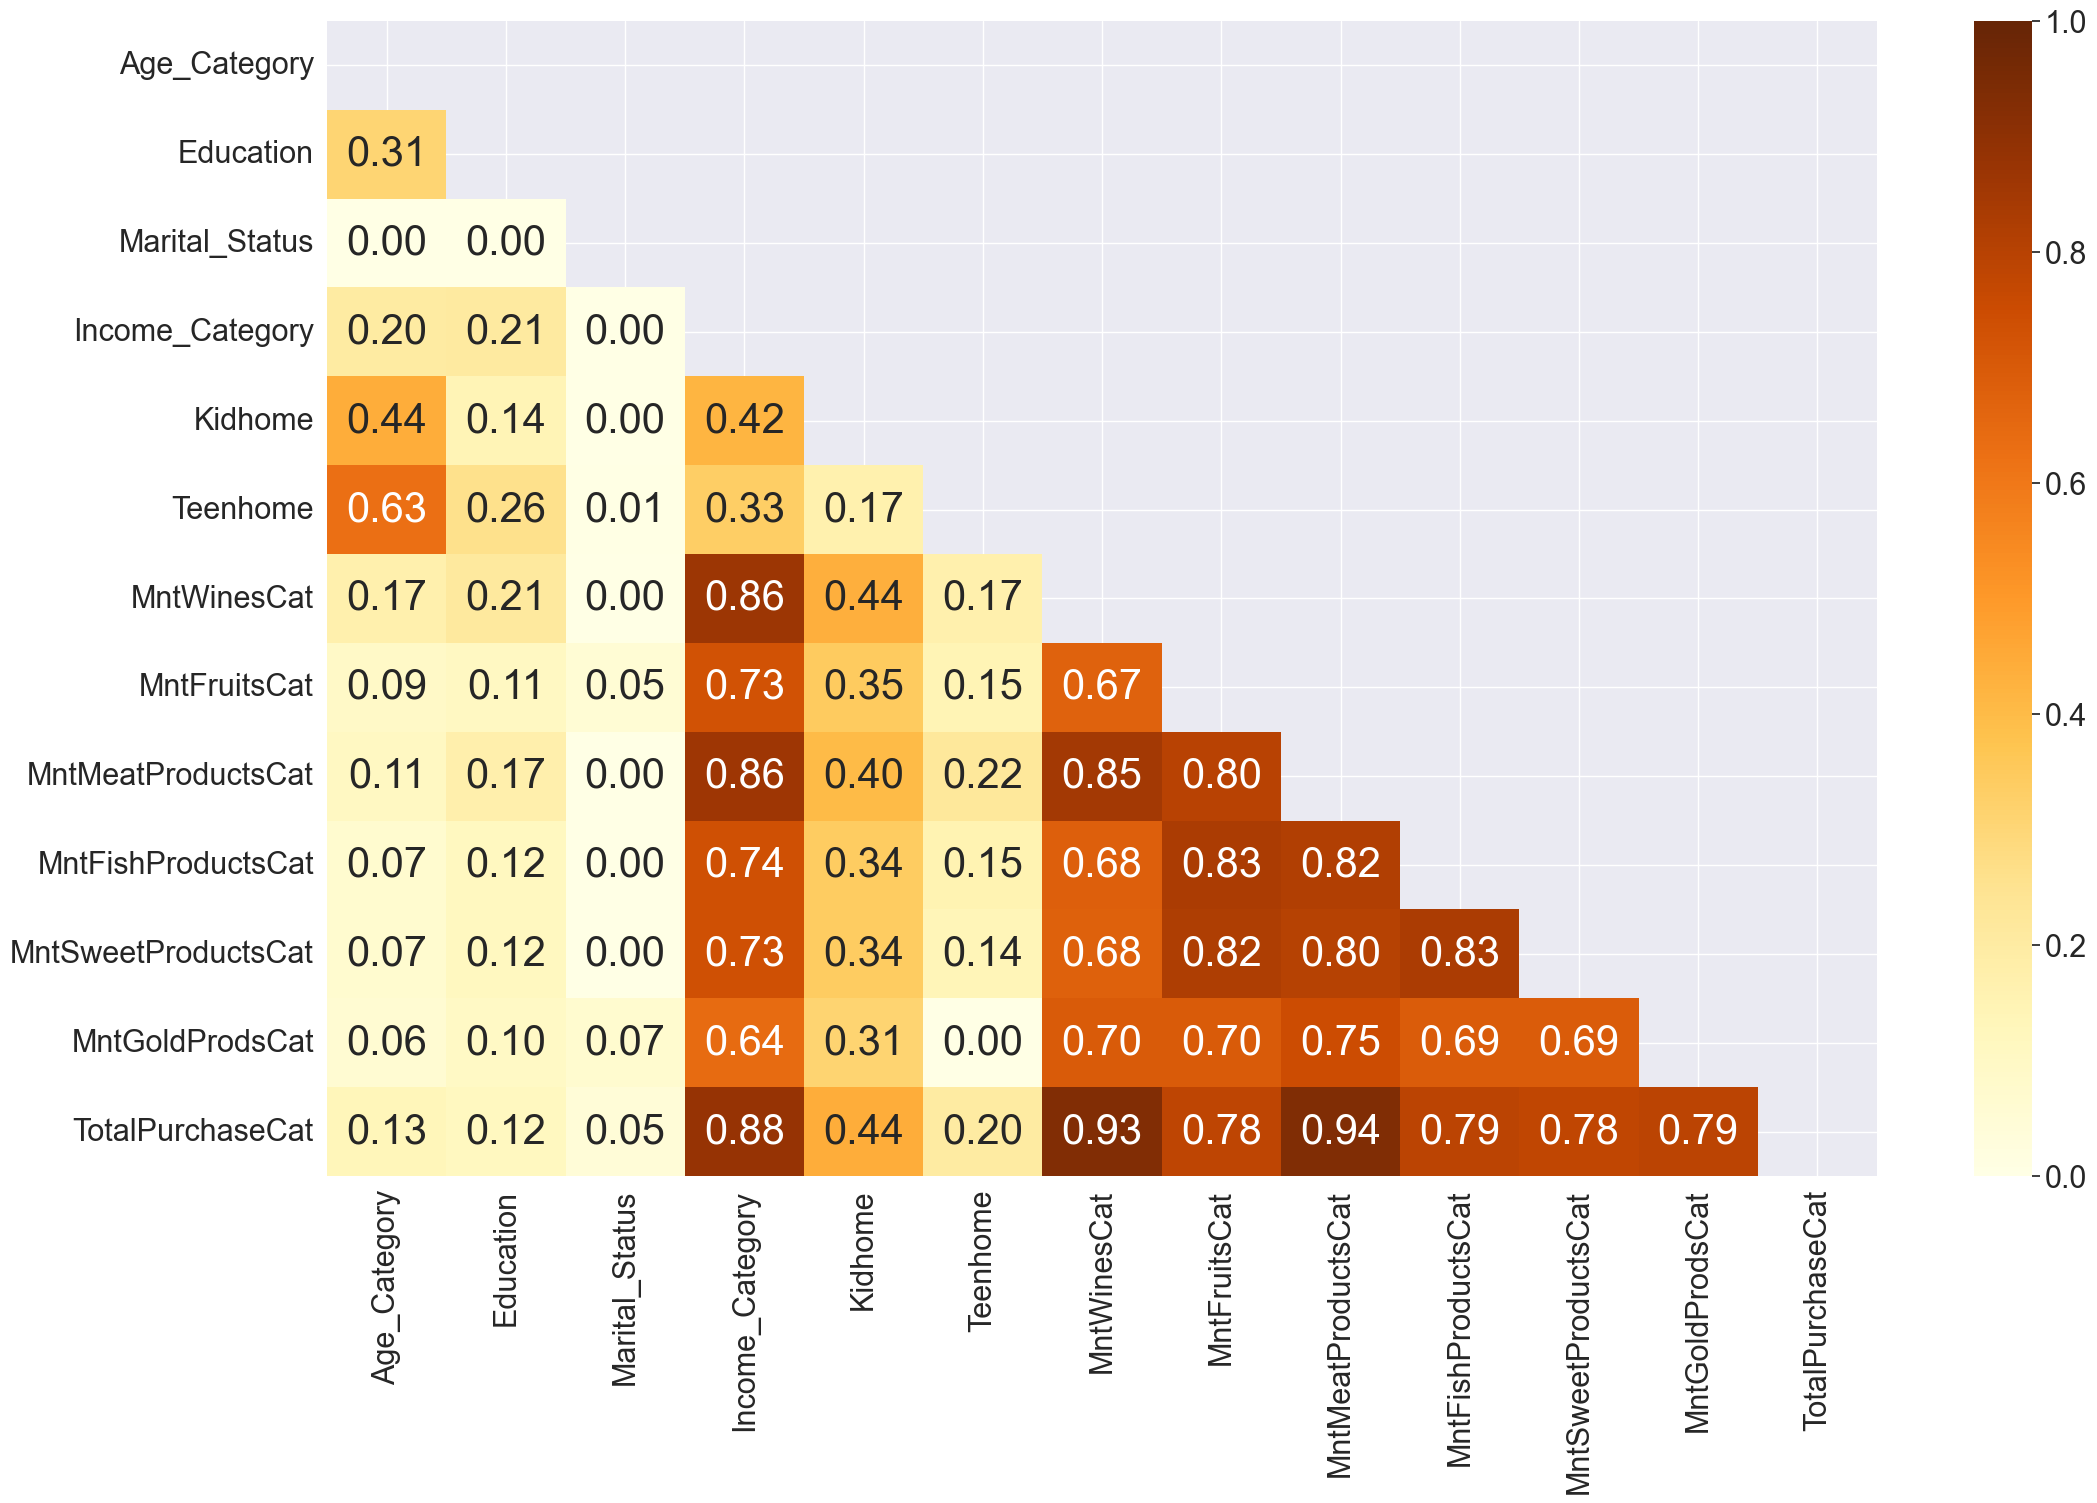

In [23]:
dfCorrMap = df[['Age_Category','Education','Marital_Status','Income_Category' ,'Kidhome','Teenhome', 'MntWinesCat','MntFruitsCat',
                'MntMeatProductsCat','MntFishProductsCat','MntSweetProductsCat','MntGoldProdsCat', 'TotalPurchaseCat']]

fig, ax = plt.subplots(figsize=(25, 15))
phik_overview = dfCorrMap.phik_matrix()
corr_mask = np.triu(np.ones_like(phik_overview, dtype=bool))
sns.heatmap(phik_overview ,mask=corr_mask, vmin=0, vmax=1, annot=True, cmap="YlOrBr", fmt='.2f', annot_kws={"fontsize":30})
sns.set(font_scale=2)
plt.show()

- Age_Category dan Education memiliki korelasi yang lemah terhadap jumlah pembelian produk
- Income_Category vs TotalPurchaseCat: Korelasi yang kuat (0.88) antara kategori pendapatan dan total pembelian (TotalPurchaseCat) menunjukkan bahwa pendapatan yang lebih tinggi sangat mempengaruhi total pembelian, yang mungkin mencerminkan daya beli yang lebih besar.
- Marital_Status memiliki korelasi yang lemah terhadap jumlah pembelian produk
- Kidhome memiliki korelasi sedang terhadap jumlah pembelian produk, begitu pula berkorelasi sedang untuk semua produk
- TeenHome memiliki korelasi yang lemah terhadap jumlah pembelian produk

## 1. Analisa Produk per Kategori

In [24]:
avg = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index, width=900, height=500,
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title_text='Average Product Purchase per Category', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

1. Wines : 50.4%
2. Meat : 27.3%
3. Gold : 7.23%
4. Fish : 6.19%
5. Sweet : 4.49%
6. Fruits : 4.34%

- Anggur mendominasi pengeluaran dengan porsi yang sangat besar, yaitu 50.4% dari total rata-rata pengeluaran pada kategori produk. Ini menunjukkan bahwa anggur adalah produk yang sangat populer di kalangan pelanggan, Hal ini kemungkinan bahwa masyarakat di sekitar supermarket ini memiliki gaya hidup dengan tingkat konsumsi produk wine yang tinggi. Ini merupakan target penjualan yang harus dipertahankan.
- Daging menempati peringkat kedua, yaitu 27.3%, yang mengindikasikan bahwa ini adalah kategori penting lainnya bagi pelanggan
- Kategori produk lain seperti produk emas (MntGoldProds), produk ikan (MntFishProducts), produk manis (MntSweetProducts), dan buah-buahan (MntFruits) menunjukkan pengeluaran yang jauh lebih rendah, dengan masing-masing di bawah 10%. Hal ini menunjukkan bahwa walaupun kategori-kategori ini dihargai oleh beberapa pelanggan, mereka tidak sepopuler anggur atau daging dalam hal pengeluaran rata-rata.

1. Fokus pada Anggur dan Daging: Strategi pemasaran dan penempatan produk harus terus mengutamakan anggur dan daging mengingat dominasi mereka dalam pengeluaran pelanggan. Promosi, penawaran khusus, dan acara yang berkaitan dengan kategori ini mungkin lebih efektif dalam meningkatkan penjualan.
2. Peluang untuk Kategori Lain: Meskipun pengeluaran pada kategori lain lebih rendah, masih ada peluang untuk meningkatkan penjualan melalui bundling produk, promosi silang, atau dengan menawarkan diskon khusus. Strategi ini bisa meningkatkan penjualan produk ikan, manis, dan buah yang relatif kurang populer.

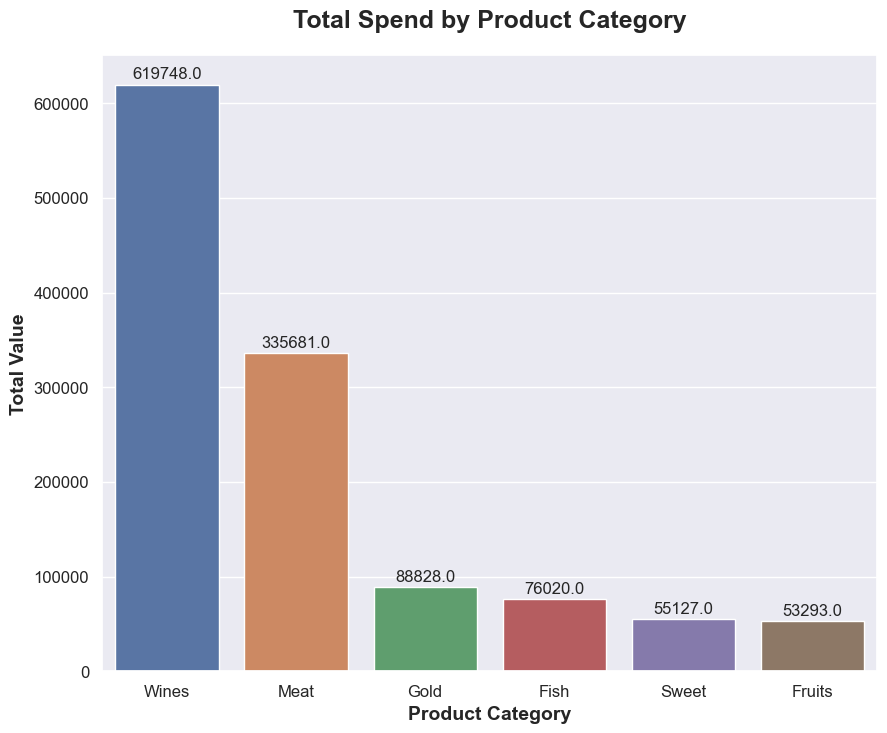

In [25]:
sumProd = df[['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts', 'MntSweetProducts', 'MntFruits']].sum(axis=0)
sumProd_sort = sumProd.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x=sumProd_sort.index, y=sumProd_sort.values, palette='deep')

ax.set_xlabel('Product Category', fontsize=14, fontweight='bold')
ax.set_ylabel('Total Value', fontsize=14, fontweight='bold')
plt.title('Total Spend by Product Category', fontsize=18, fontweight='bold', pad=20)

ax.tick_params(labelsize=12)
ax.set_xticklabels(['Wines', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruits'])

plt.rcParams['font.family'] = 'sans-serif'

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', size=12, padding=2)

plt.show()

## 2. Demografis Pelanggan

In [26]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
display(df.groupby('Age_Category')[cols].agg('mean'),
        df.groupby('Marital_Status')[cols].agg('mean'),
        df.groupby('Income_Category')[cols].agg('mean'),
        df.groupby('Education')[cols].agg('mean'),
        df.groupby('Kidhome')[cols].agg('mean'),
        df.groupby('Teenhome')[cols].agg('mean')
)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_Category,,,,,,
1. Adult,238.825581,28.339535,173.967442,38.800000,28.197674,42.127907
2. Elderly,298.228648,25.031139,149.887900,34.599644,25.619217,42.021352
3. Old,387.727079,27.658849,197.017058,43.594883,30.289979,50.066098


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Relationship,304.121329,25.670015,161.35626,37.098918,26.878671,42.795209
Single,310.308642,27.539095,174.05487,38.427984,27.909465,45.886145


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income_Category,,,,,,
1. Lower,21.547431,5.958498,23.286561,8.693676,5.992095,17.225296
2. Lower-Middle,126.436759,8.057312,47.980237,13.221344,8.454545,28.189723
3. Upper-Middle,434.419802,30.201980,157.411881,38.857426,28.201980,58.297030
4. Upper,643.252964,61.164032,435.033597,89.541502,66.353755,71.952569


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Graduate,284.873031,31.277559,181.266732,43.904528,31.711614,50.437992
Post Graduate,344.399791,21.885177,157.552192,31.883090,23.267223,38.066806
Under Graduate,7.795918,11.204082,11.816327,17.734694,12.612245,22.755102


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Kidhome,,,,,,
0,456.575835,39.468723,252.162811,56.362468,40.970865,59.898886
1,103.601227,8.541104,49.365644,12.212270,8.759509,22.357055
2,60.707317,6.634146,28.634146,7.121951,4.268293,17.195122


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Teenhome,,,,,,
0,307.106628,33.486071,226.258405,48.545629,33.967339,44.932757
1,302.944266,18.818864,100.669882,26.053591,20.364416,42.652733
2,355.163265,17.877551,126.959184,24.000000,15.653061,46.081633


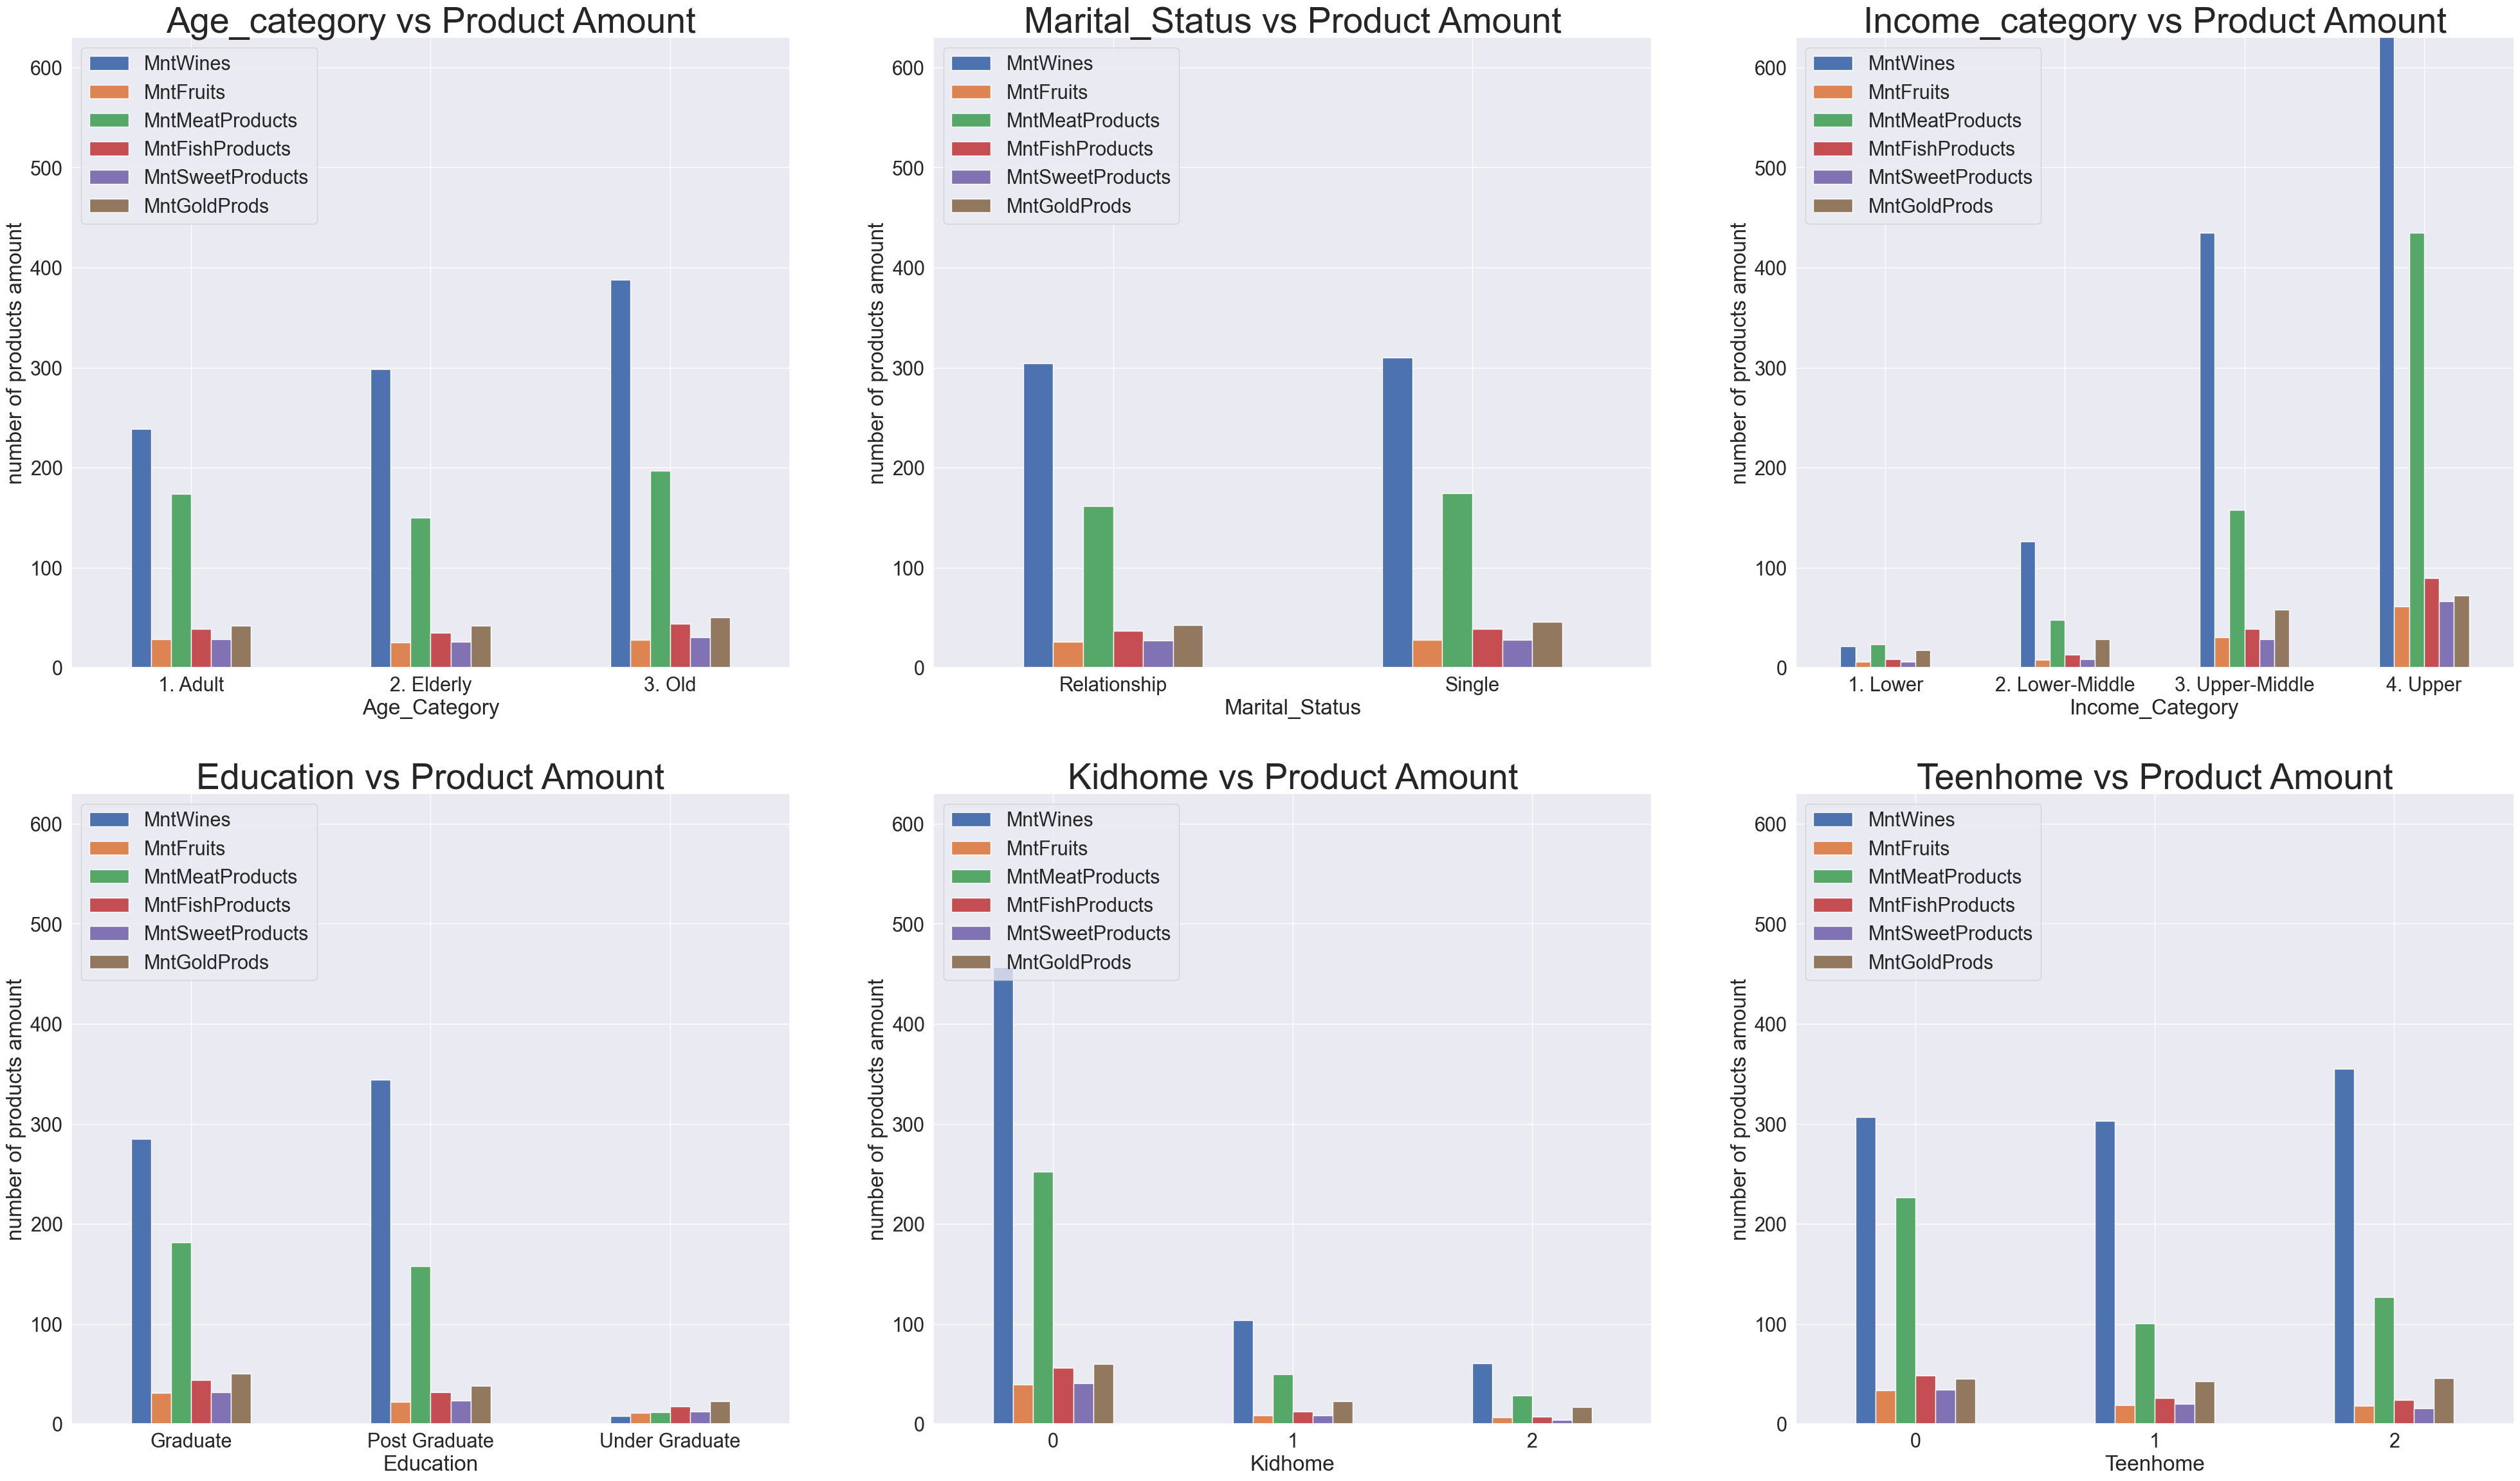

In [27]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_Category', 'Marital_Status', 'Income_Category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Age_category vs Product Amount', 'Marital_Status vs Product Amount', 'Income_category vs Product Amount']
titleEach2 = ['Education vs Product Amount', 'Kidhome vs Product Amount', 'Teenhome vs Product Amount']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])[cols].agg('mean').plot(kind='bar', ax=i[0])
    df.groupby(i[3])[cols].agg('mean').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4], fontsize=40)
    i[1].set_title(i[5], fontsize=40)
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=630)
    i[1].set_ylim(bottom=0, top=630)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper left')

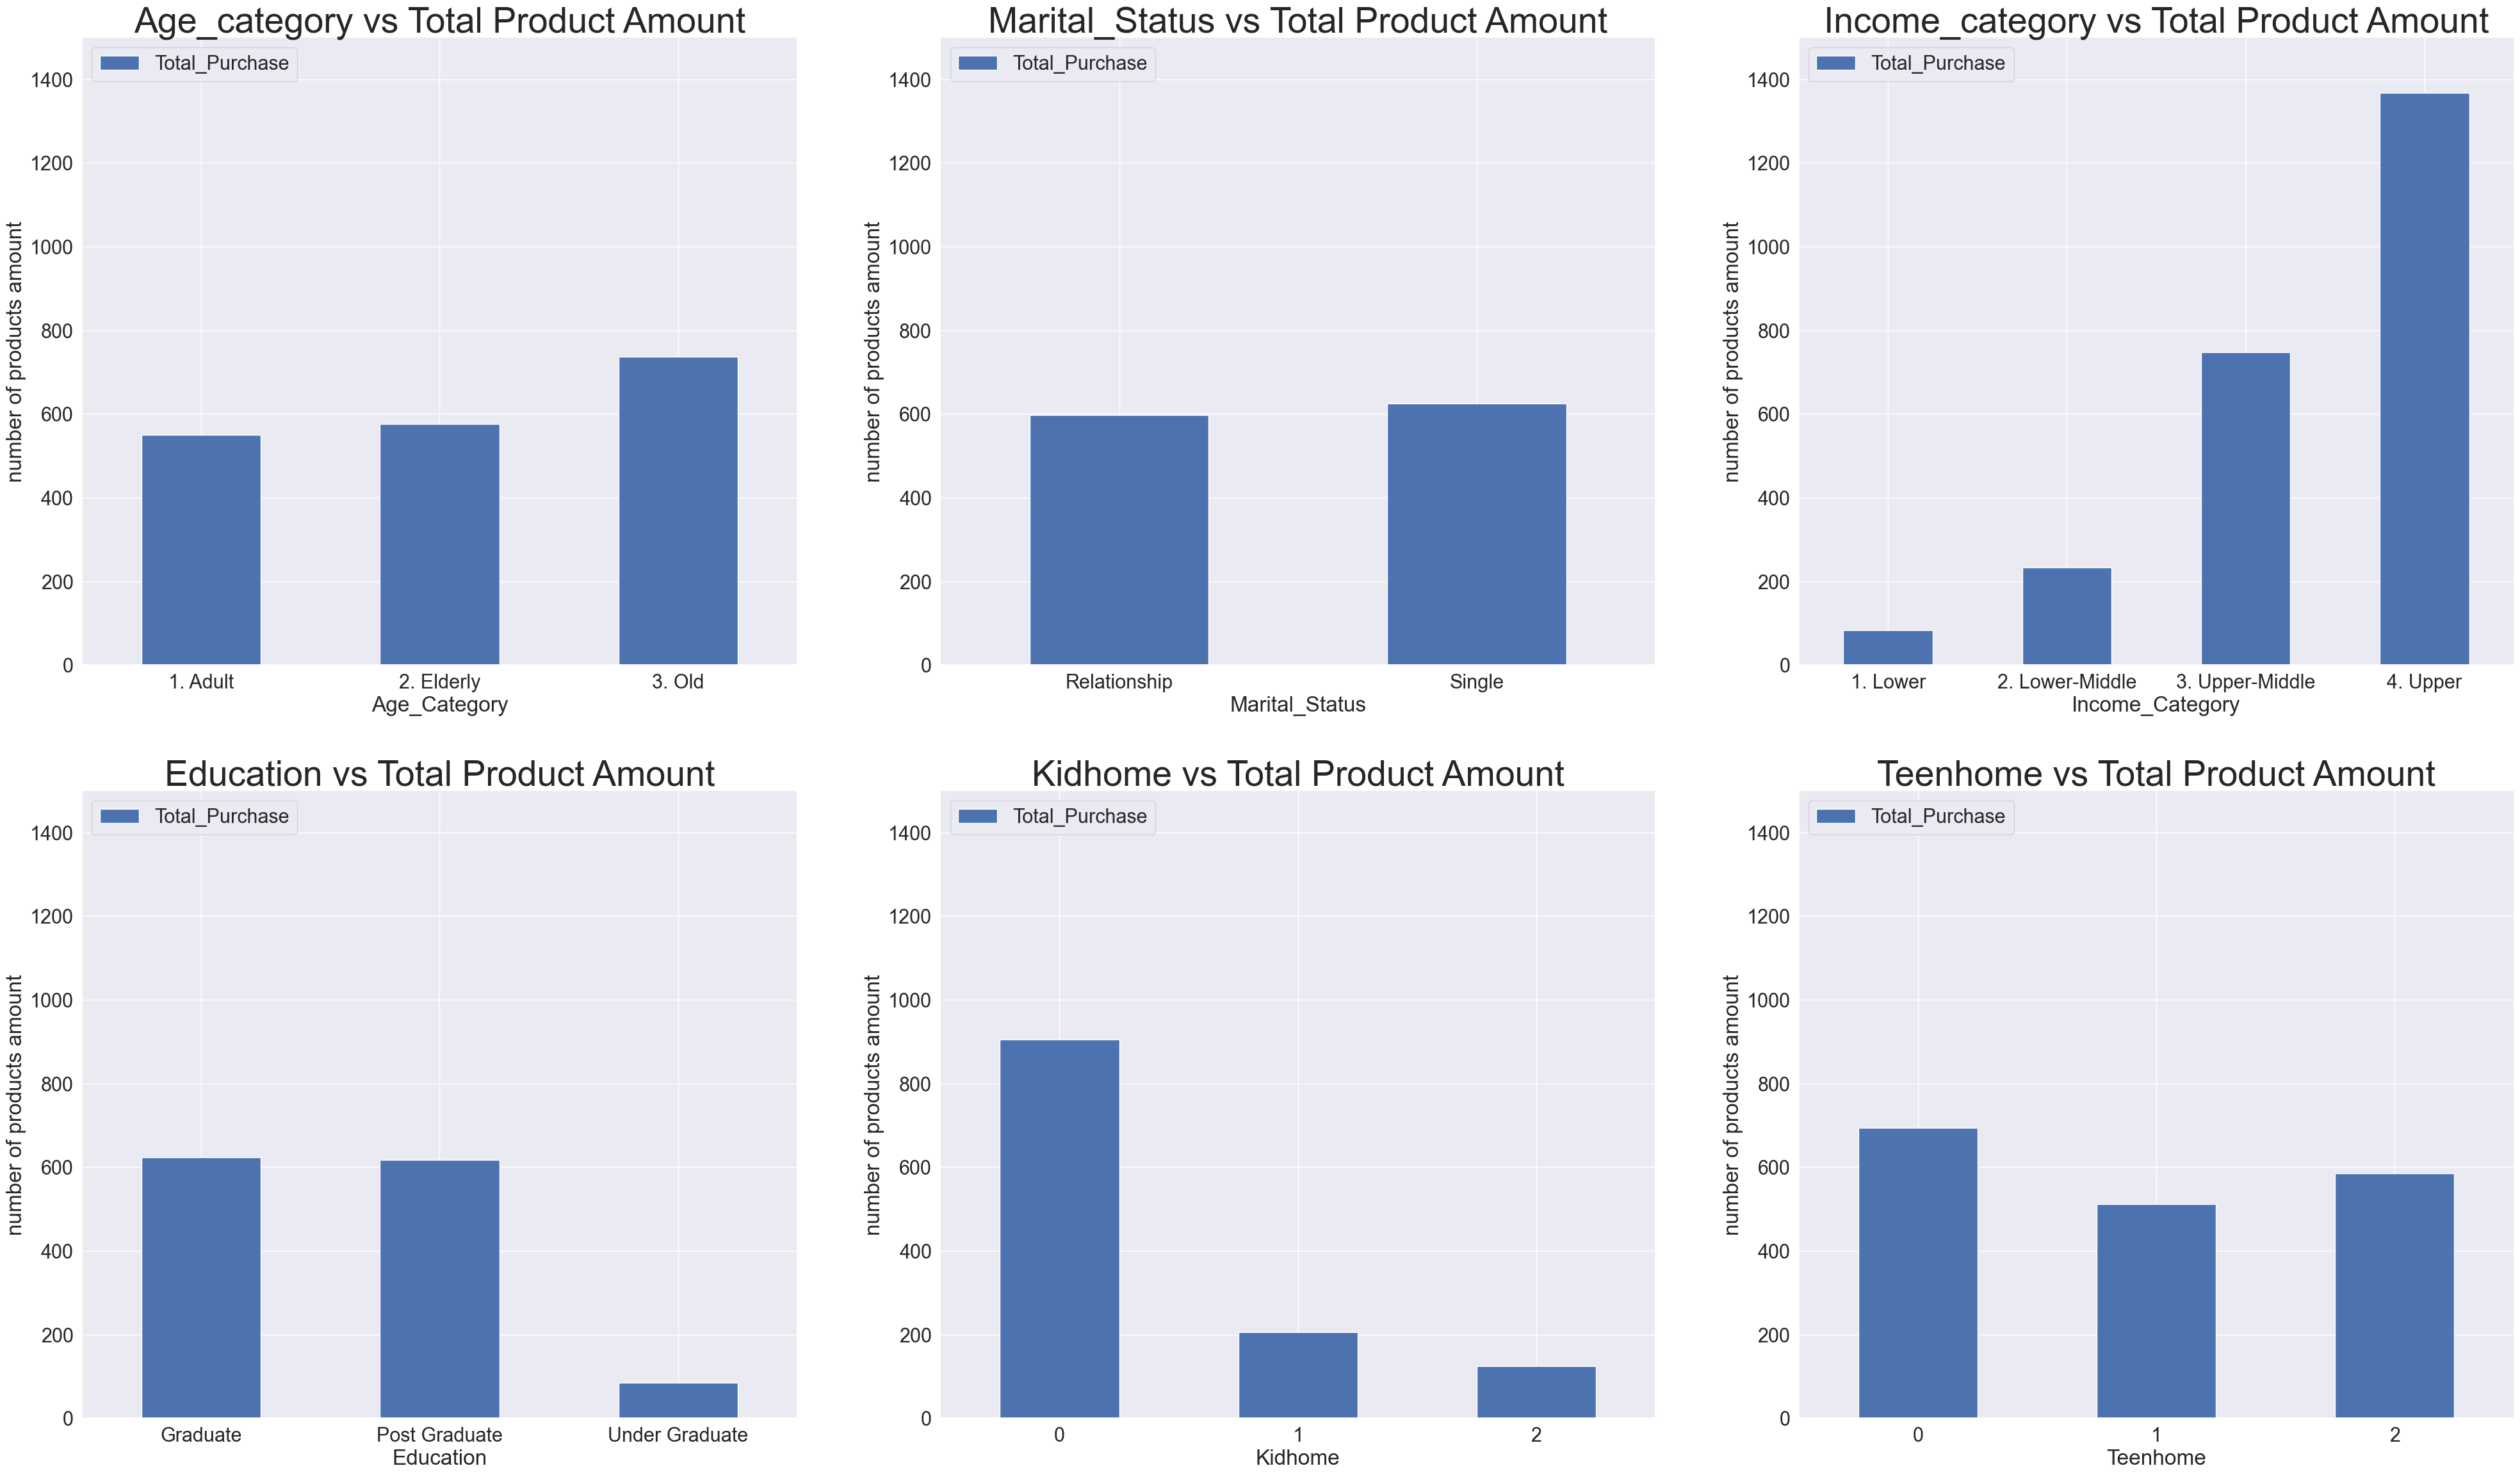

In [28]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_Category', 'Marital_Status', 'Income_Category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Age_category vs Total Product Amount', 'Marital_Status vs Total Product Amount', 'Income_category vs Total Product Amount']
titleEach2 = ['Education vs Total Product Amount', 'Kidhome vs Total Product Amount', 'Teenhome vs Total Product Amount']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])['Total_Purchase'].agg('mean').plot(kind='bar', ax=i[0])
    df.groupby(i[3])['Total_Purchase'].agg('mean').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4], fontsize=40)
    i[1].set_title(i[5], fontsize=40)
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=1500)
    i[1].set_ylim(bottom=0, top=1500)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper left')

Kesimpulan:
1. Hubungan Usia dengan Jumlah Pembelian<br>
    Terdapat peningkatan jumlah pembelian di kategori usia yang lebih tua, menunjukkan bahwa pelanggan yang lebih senior cenderung menghabiskan lebih banyak, mungkin karena stabilitas keuangan atau kecenderungan membeli produk berkualitas tinggi.
    
2. Hubungan Status Perkawinan dengan Jumlah Pembelian<br>
    Tidak ada perbedaan signifikan dalam jumlah pembelian berdasarkan status perkawinan. Baik lajang, menikah, atau dalam hubungan, pola pembelian tampak seragam, mengindikasikan bahwa status perkawinan mungkin bukan faktor utama yang mempengaruhi keputusan pembelian.

3. Hubungan Kategori Pendapatan dengan Jumlah Pembelian<br>
    Ada korelasi yang kuat antara pendapatan dan jumlah pembelian, pelanggan dengan pendapatan lebih tinggi cenderung menghabiskan lebih banyak. Hal ini menegaskan bahwa pendapatan adalah indikator penting dalam kemampuan dan kecenderungan pembelian produk.

4. Hubungan Pendidikan dengan Jumlah Pembelian<br>
    Tingkat pendidikan berpengaruh terhadap jenis produk yang dibeli, dengan pelanggan yang lebih terdidik cenderung membeli lebih banyak produk anggur, yang mungkin menandakan preferensi terhadap produk premium atau mewah.

5. Hubungan Kidhome dengan Jumlah Pembelian<br>
    Pelanggan dengan anak di rumah cenderung mengurangi pengeluaran mereka pada produk tertentu. Hal ini dapat mengindikasikan anggaran yang lebih terbatas atau prioritas pengeluaran yang berfokus pada kebutuhan keluarga daripada pembelian pribadi.

6. Hubungan Teenhome dengan Jumlah Pembelian<br>
    Pengaruh jumlah remaja di rumah terhadap jumlah pembelian lebih kecil dibandingkan dengan kehadiran anak-anak yang lebih muda
    
7. Stategi penjualan untuk anggur : Pembelian anggur meningkat secara signifikan di kalangan pelanggan dari semua usia, pendidikan, dan kategori pendapatan, menegaskan lagi bahwa anggur adalah pilihan populer di berbagai demografi. Strategi promosi seperti diskon atau penawaran bundling pada anggur dapat meningkatkan penjualan lebih lanjut.


## 3. Efektifitas Kampanye

In [29]:
CmpReceive = df['Total_Acc_Cmp'].value_counts()
CmpReceive

Total_Acc_Cmp
0    1597
1     301
2      75
3      40
4      10
Name: count, dtype: int64

In [30]:
counts = df['Total_Acc_Cmp'].map({0:"Not Receive The Campaign", 1:"Receive The Campaign", 2:"Receive The Campaign", 3:"Receive The Campaign", 4:"Receive The Campaign"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, hole=0.6, width=900, height=500,
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title_text='Percentage of Customers Complained', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

,Total_Purchase
Total_Acc_Cmp,
0,479.968065
1,907.647841
2,1424.826667
3,1689.075000
4,1456.100000


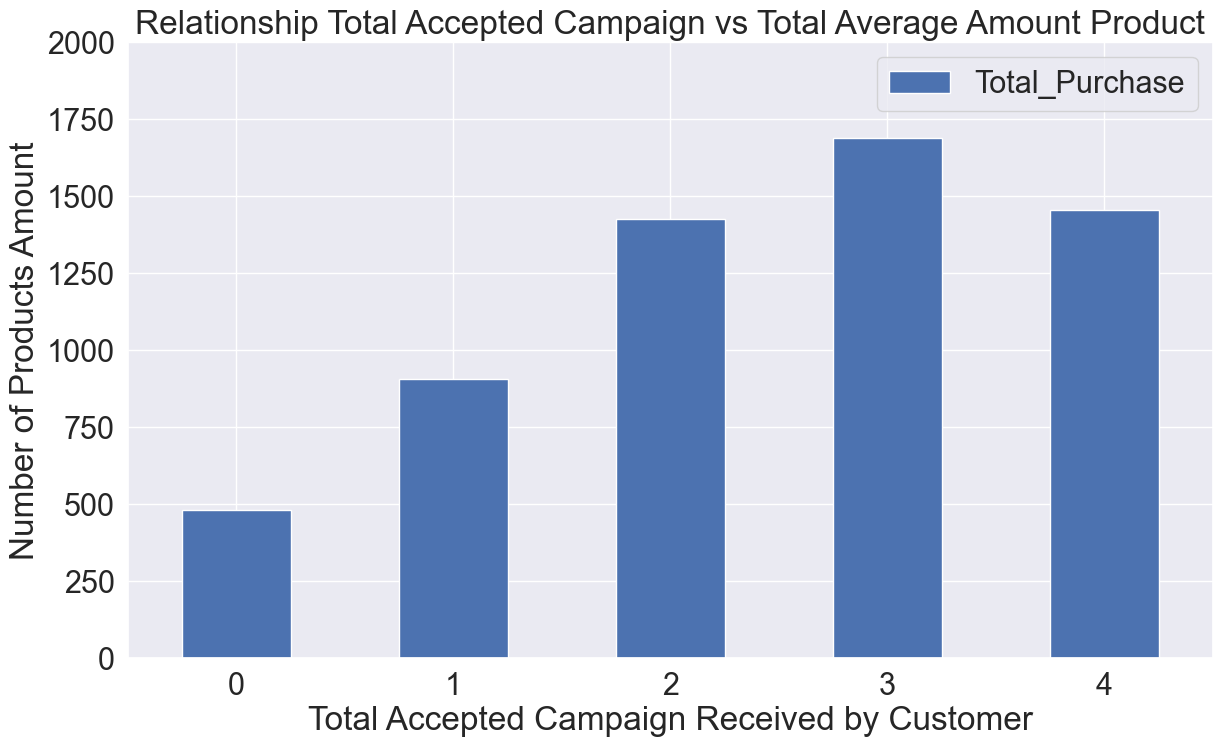

In [31]:
cols = ["Total_Purchase"]
display(df.groupby('Total_Acc_Cmp')[cols].agg('mean'))

fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(14,8))

axEach = [ax1]
colList = ['Total_Acc_Cmp']
titleEach = ['Relationship Total Accepted Campaign vs Total Average Amount Product']

for i in zip(axEach,colList,titleEach):
    df.groupby(i[1])[cols].agg('mean').plot(kind='bar', ax=i[0])
    i[0].set_title(i[2])
    i[0].tick_params(axis='x', labelrotation=360)
    i[0].set_xlabel('Total Accepted Campaign Received by Customer')
    i[0].set_ylabel('Number of Products Amount')
    i[0].set_ylim(bottom=0, top=2000)

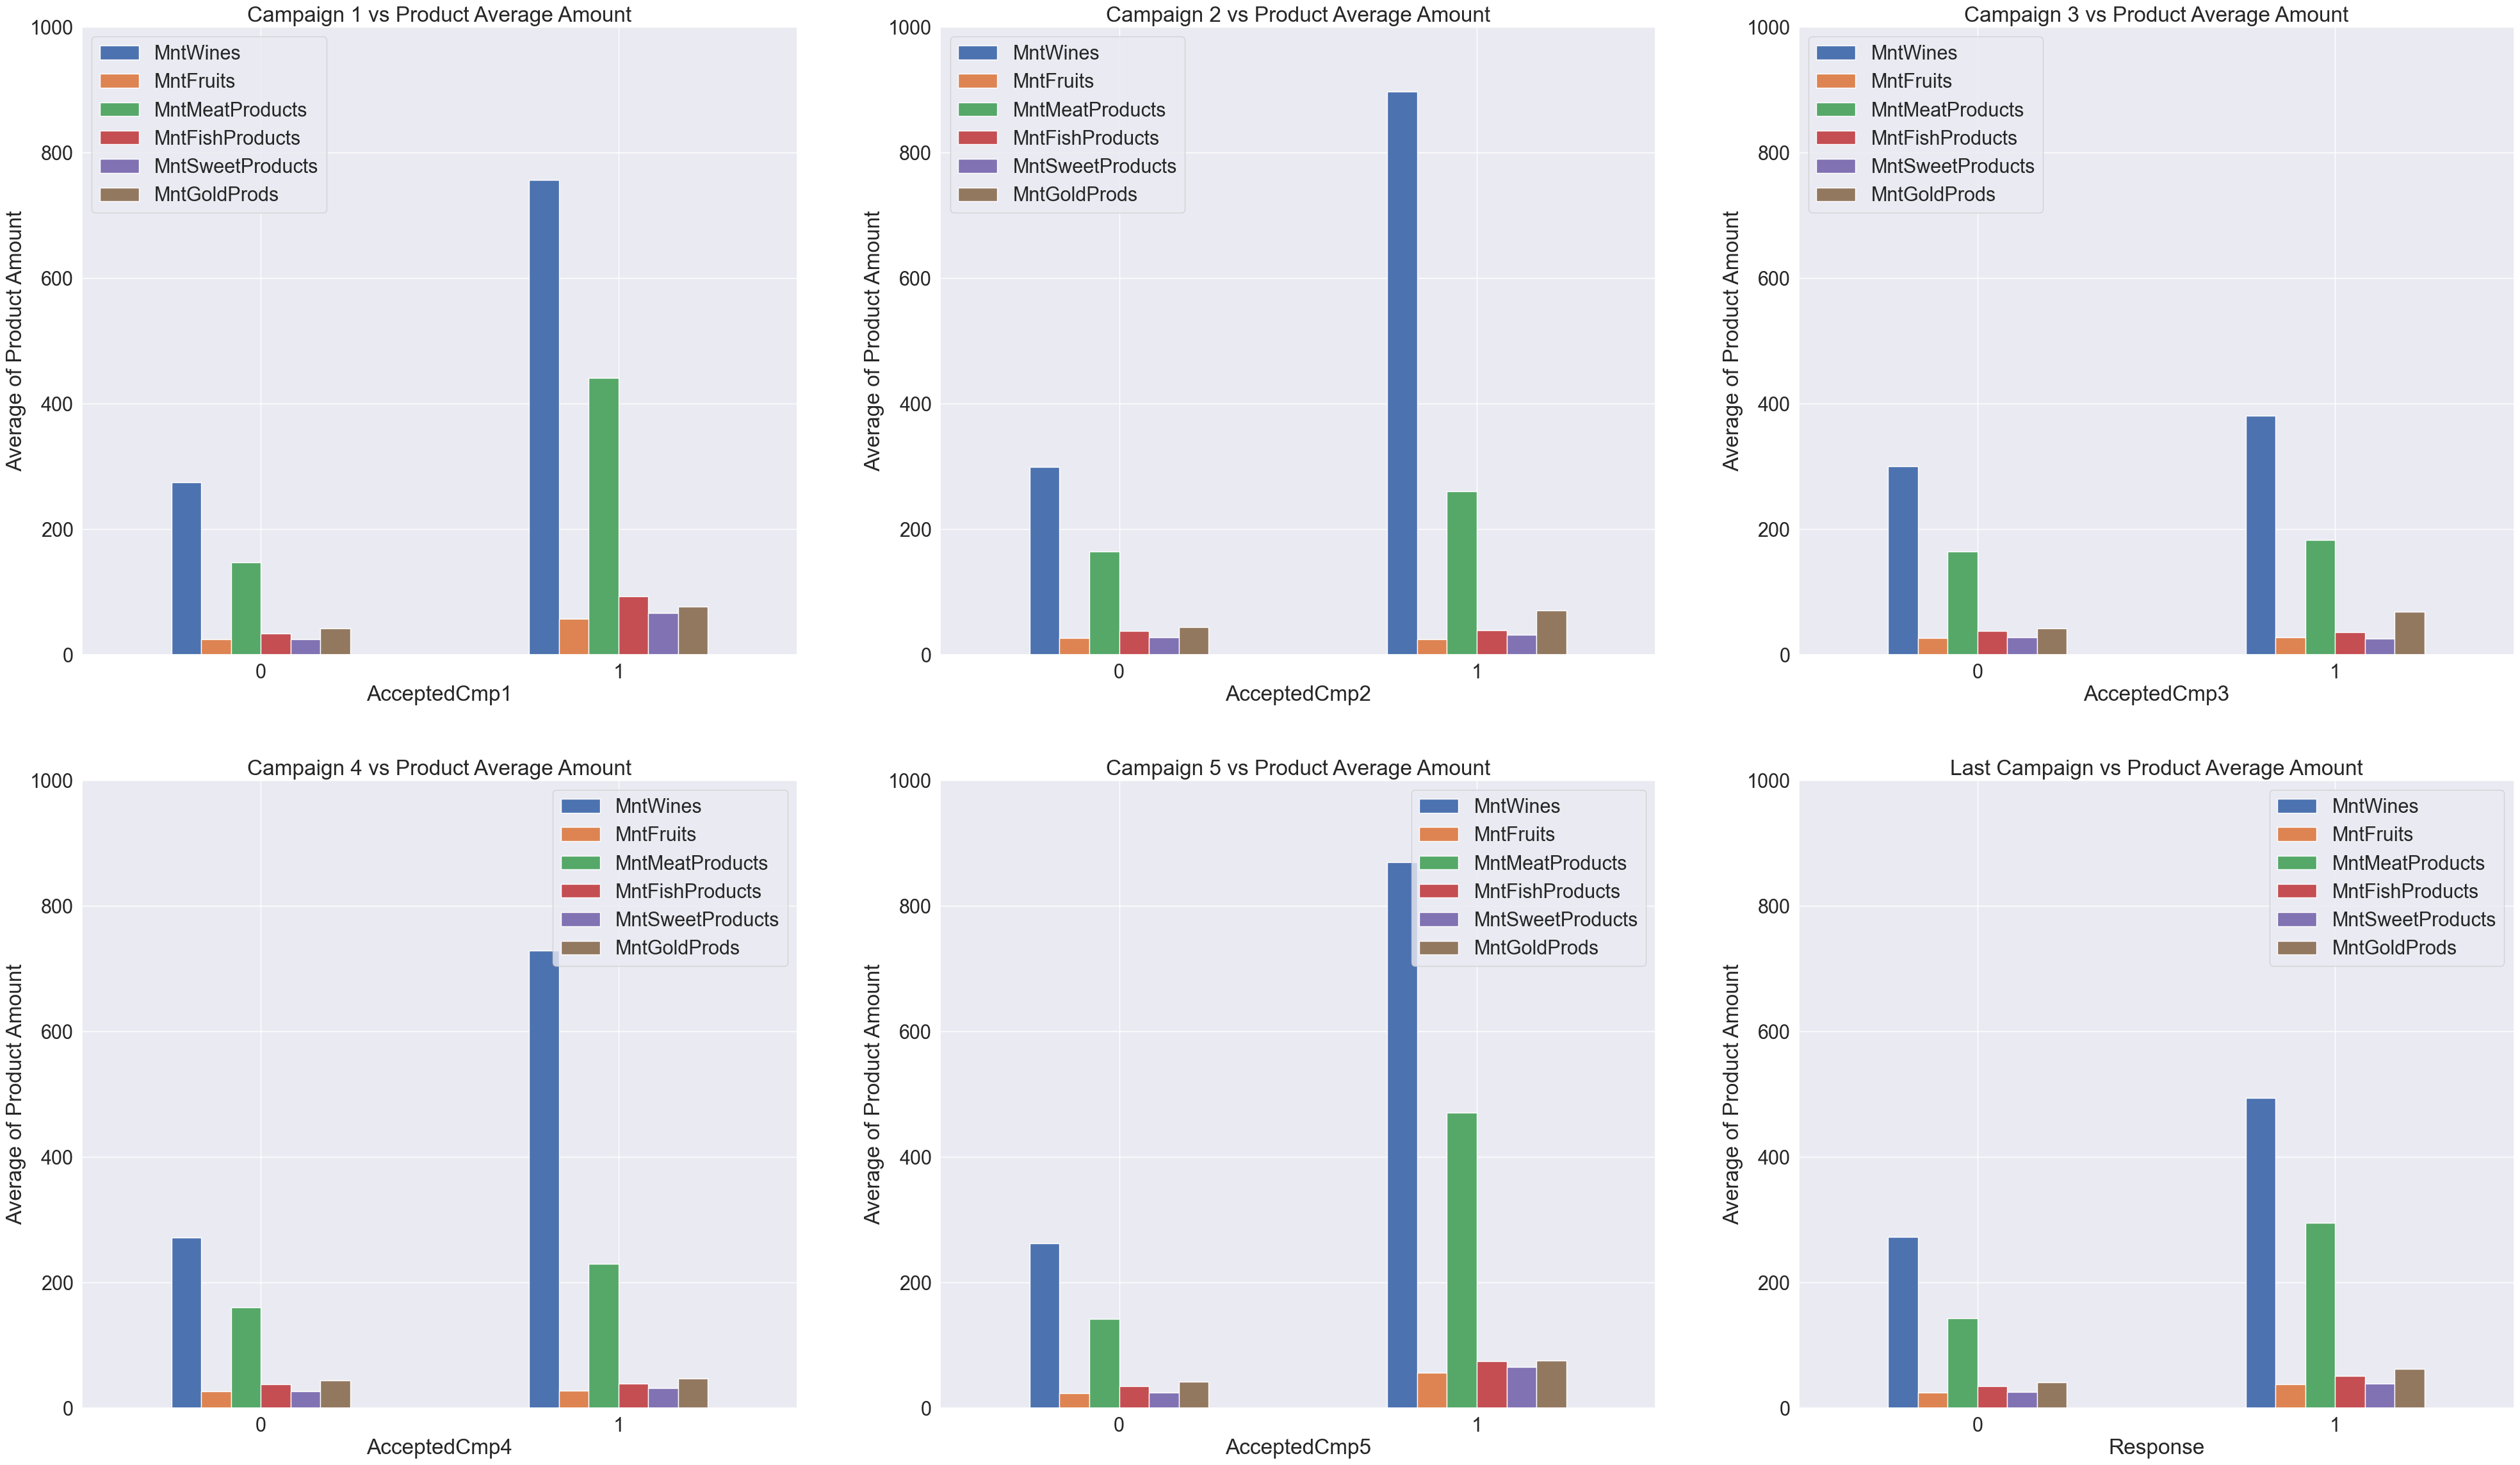

In [32]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

ColProds = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]

colList = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3']
colList2 = ['AcceptedCmp4', 'AcceptedCmp5', 'Response']

titleEach = ['Campaign 1 vs Product Average Amount', 'Campaign 2 vs Product Average Amount', 'Campaign 3 vs Product Average Amount']
titleEach2 = ['Campaign 4 vs Product Average Amount', 'Campaign 5 vs Product Average Amount', 'Last Campaign vs Product Average Amount']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])[ColProds].agg('mean').plot(kind='bar', ax=i[0])
    df.groupby(i[3])[ColProds].agg('mean').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4])
    i[1].set_title(i[5])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('Average of Product Amount')
    i[1].set_ylabel('Average of Product Amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=1000)
    i[1].set_ylim(bottom=0, top=1000)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper right')

Kesimpulan : kampanye yang diterima pelanggan cukup berhasil meningkatkan jumlah pembelian produk. Peningkatan terbesar terjadi pada produk anggur dan daging

## 4. Tempat Penjualan

In [33]:
avg = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean(axis=0)

fig = px.pie(values=avg.values, names=avg.index, width=900, height=500,
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title_text='Average Amount Spent on Product Categories', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.99,
                      xanchor="right",
                      x=0.99
                  ))

In [34]:
columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
columns_new = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']

total = df[columns].sum()
total.index = columns_new
total = total.reset_index(name='total')

fig = px.treemap(total, path=['index'],values='total', width=900, height=400,
                 color_discrete_sequence=px.colors.qualitative.Antique)

fig.data[0].textinfo = 'label+text+value'
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25),
                  title_text='The Number of Purchases for Each Market Place',
                  title_x = 0.5,
                  title_y = 0.96)
fig.update_traces(textposition='middle center')
fig.layout.hovermode = False

fig.show()

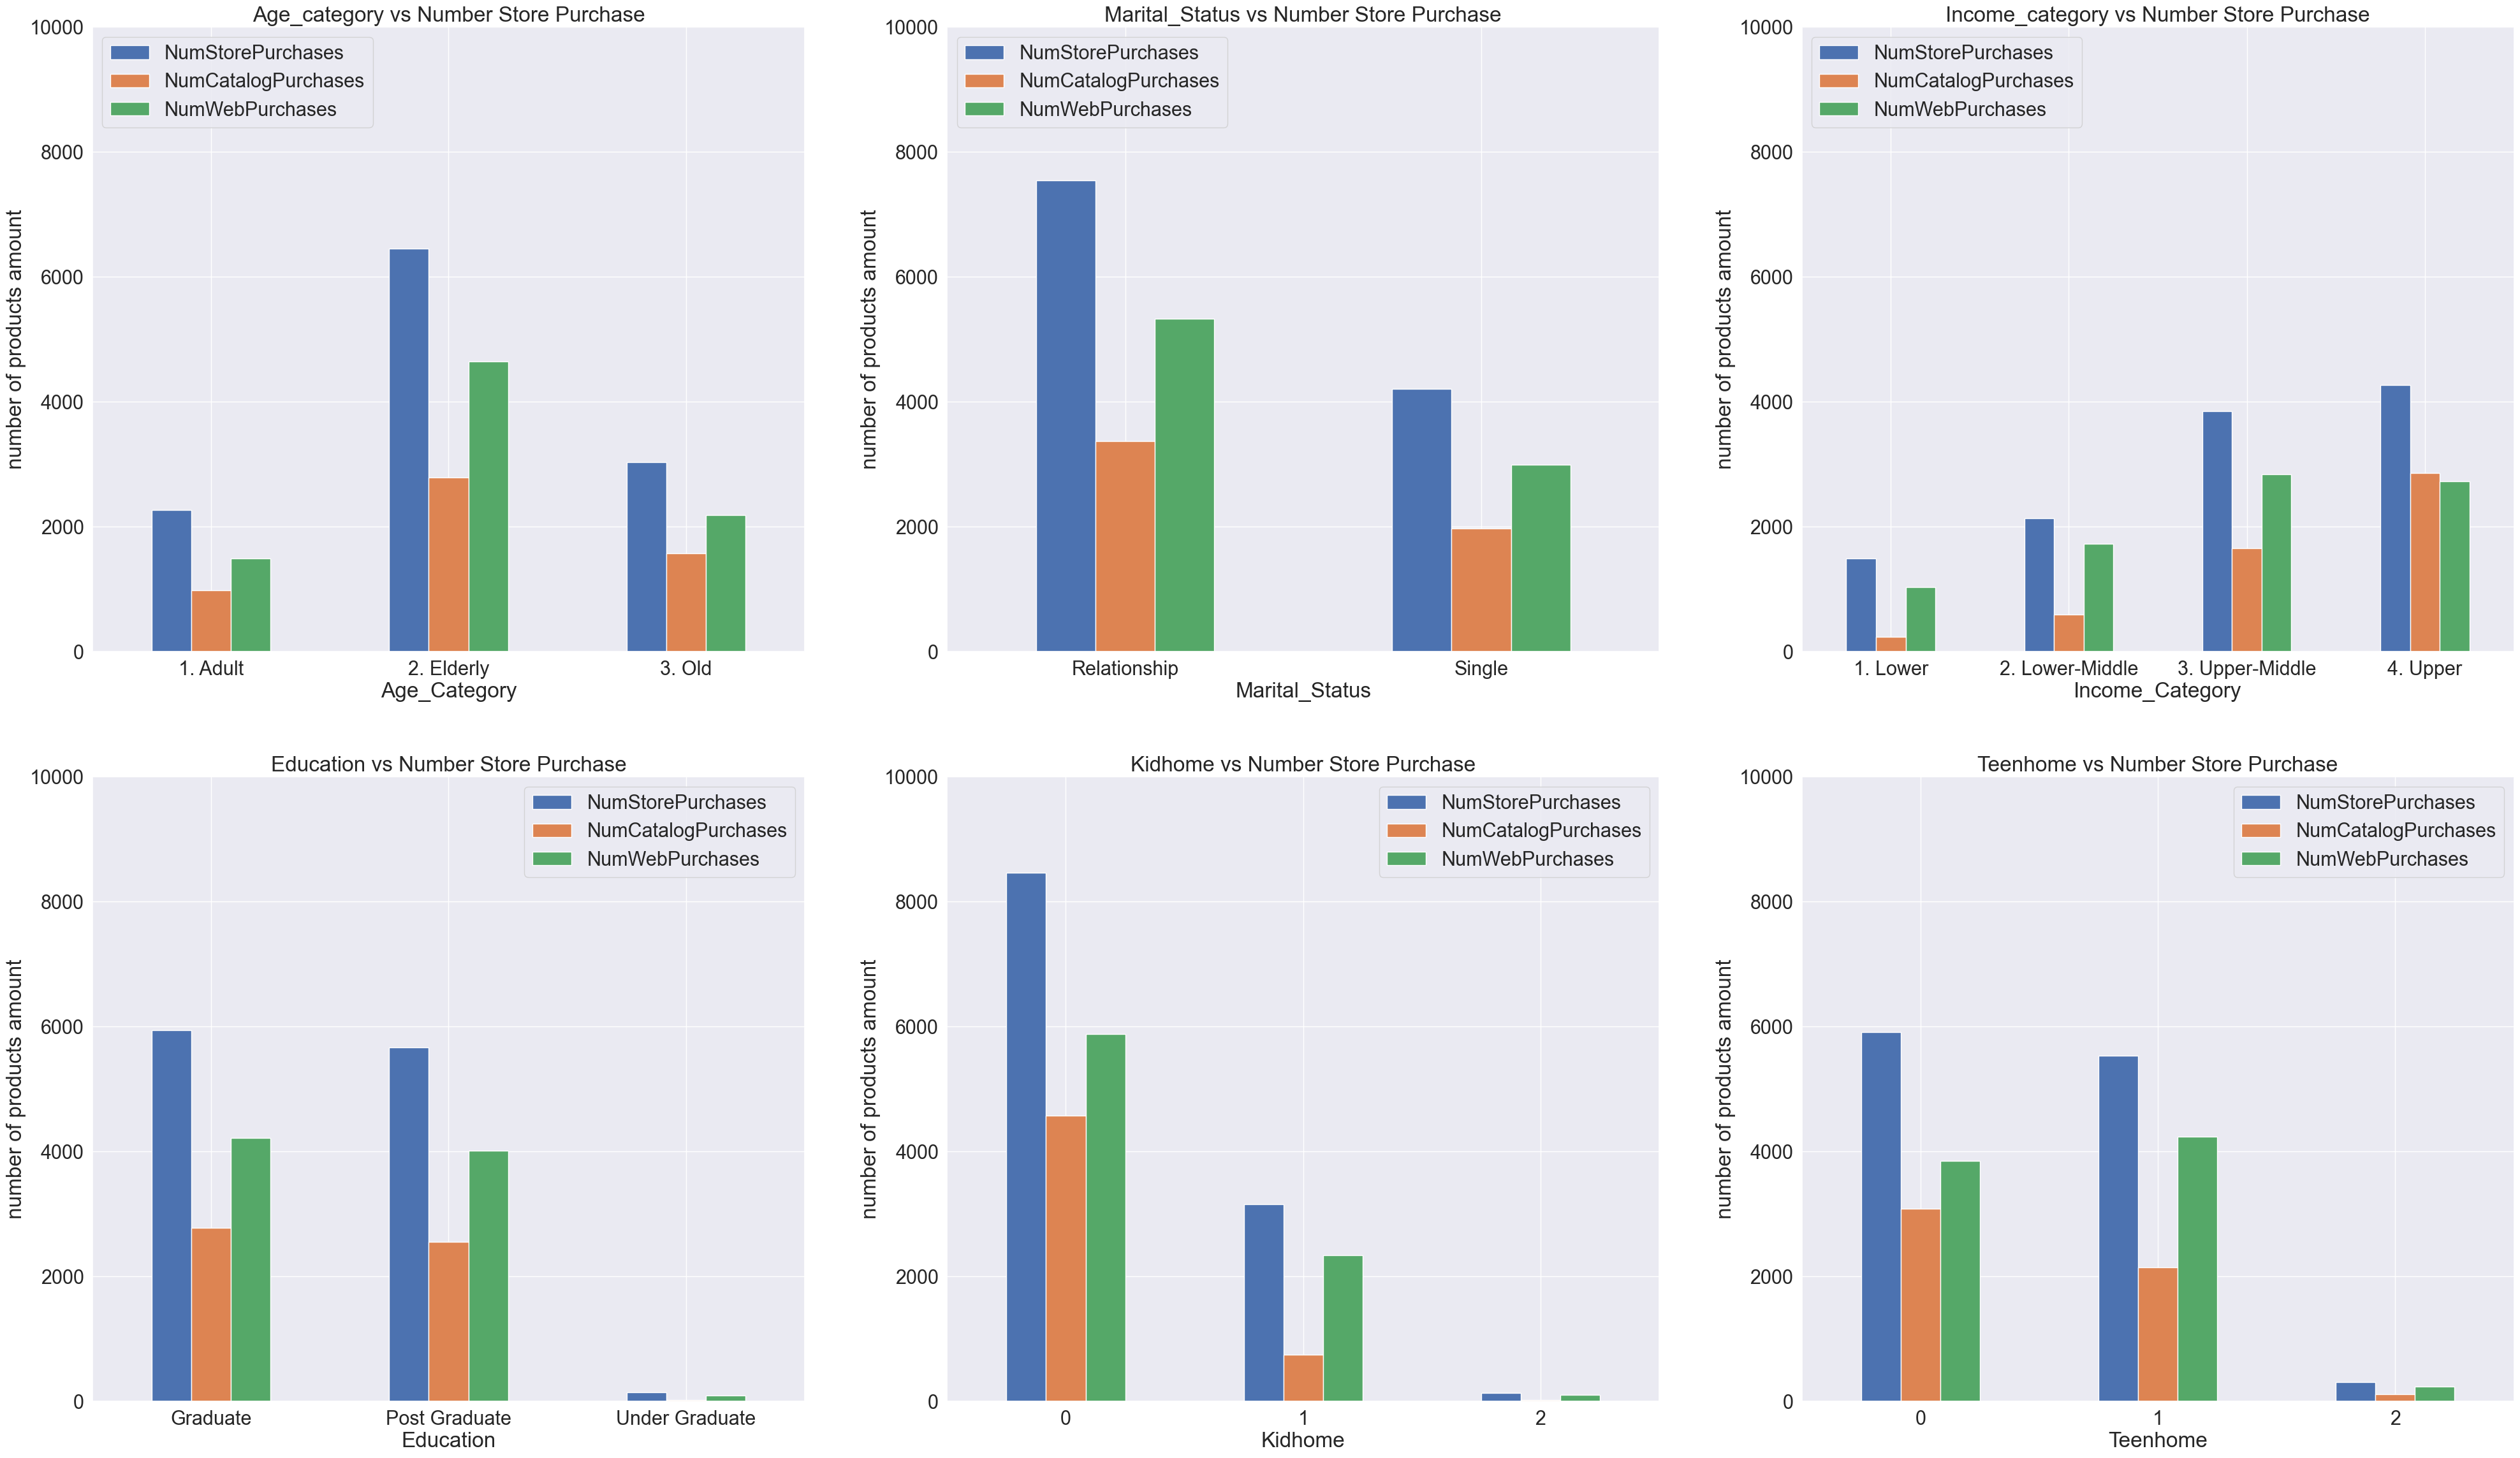

In [35]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(49,28))

ColCust = ['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases']

axEach = [ax1,ax2,ax3]
axEach2 = [ax4,ax5,ax6]
colList = ['Age_Category', 'Marital_Status', 'Income_Category']
colList2 = ['Education', 'Kidhome', 'Teenhome']
titleEach = ['Age_category vs Number Store Purchase', 'Marital_Status vs Number Store Purchase', 'Income_category vs Number Store Purchase']
titleEach2 = ['Education vs Number Store Purchase', 'Kidhome vs Number Store Purchase', 'Teenhome vs Number Store Purchase']

for i in zip(axEach, axEach2, colList, colList2, titleEach, titleEach2):
    # data
    df.groupby(i[2])[ColCust].agg('sum').plot(kind='bar', ax=i[0])
    df.groupby(i[3])[ColCust].agg('sum').plot(kind='bar', ax=i[1])
    # set title
    i[0].set_title(i[4])
    i[1].set_title(i[5])
    # set x label rotation
    i[0].tick_params(axis='x', labelrotation=360)
    i[1].tick_params(axis='x', labelrotation=360)
    # set y label
    i[0].set_ylabel('number of products amount')
    i[1].set_ylabel('number of products amount')
    # set y limit
    i[0].set_ylim(bottom=0, top=10000)
    i[1].set_ylim(bottom=0, top=10000)
    # set legend
    i[0].legend(loc='upper left')
    i[1].legend(loc='upper right')

Data diatas menunjukan bahwa jumlah pembelian dari Toko Langsung yang paling banyak yaitu 11747 pembelian, disusul pembelian dari Web sebanyak 8327 pembelian dan yang paling sedikit pembelian dari katalog dengan 5346 pembelian.

## Keluhan Pelanggan

In [36]:
counts = df['Complain'].map({0:"No", 1:"Yes"}).value_counts()

fig = px.pie(values=counts.values, names=counts.index, width=600, height=500,
             color_discrete_sequence=px.colors.qualitative.Antique)
fig.update_layout(title_text='Percentage of Customers Complained', title_x=0.5)

Data diatas menunjukan sebagian besar pelanggan (99.1%) tidak memiliki keluhan, sementara hanya 0.93% pelanggan yang mengajukan keluhan

## Kesimpulan

#### 1. Analisis Produk: 
Produk seperti wine dan daging sangat populer dan menghasilkan penjualan yang signifikan, sedangkan produk seperti buah dan manisan kurang diminati. Varian dalam penjualan menandakan perbedaan dalam preferensi konsumen yang bisa jadi dipengaruhi oleh faktor musiman, tren makanan, dan kebiasaan konsumsi.


#### 2. Demografi Pelanggan
Pengaruh Demografi pada Pembelian: Berdasarkan analisis diatas diketahui bahwa kategori usia, pendapatan, pendidikan, dan jumlah anak dirumah memiliki hubungan yang tinggi, sedangkan status pernikahan dan jumlah remaja dirumah memiliki hubungan yang rendah

#### 3. Efektifitas Kampanye

Kampanye yang diterima pelanggan cukup berhasil meningkatkan jumlah pembelian produk. Peningkatan terbesar terjadi pada produk anggur dan daging

#### 4. Tempat

Ditemukan bahwa jumlah pembelian dari Toko Langsung sebanyak 11747 pembelian, disusul pembelian dari Web sebanyak 8327 pembelian dan yang paling sedikit pembelian dari katalog dengan 5346 pembelian.

Toko Langsung menjadi pilihan utama pelanggan dibandingkan pembelian online atau via katalog, menunjukkan bahwa banyak pelanggan memilih pengalaman berbelanja langsung yang memberi mereka kesempatan untuk berinteraksi langsung dengan produk

#### 5. Keluhan Pelanggan

Dengan tingkat keluhan pelanggan di bawah 1% merupakan hal yang sangat baik dan harus terus dipertahankan bahkan ditingkatkan.

## Rekomendasi

Berdasarkan hasil analisis, beberapa hal yang dapat direkomendasikan adalah :
- Memperkuat Penjualan Produk yang Laris: Terus kembangkan dan tingkatkan pemasaran untuk kategori produk yang sudah laris seperti wine dan produk daging dengan penawaran khusus, edisi terbatas, atau melalui event tasting yang dapat meningkatkan interaksi pelanggan dengan produk.
- Meningkatkan Penjualan Produk yang Kurang Laris: Implementasikan strategi pemasaran kreatif seperti promosi silang (cross-promotion), bundling, diskon atau melalui event tasting untuk produk yang kurang laris seperti buah dan manisan, yang mungkin memerlukan visibilitas dan daya tarik yang lebih besar di mata pelanggan.
- Penggunaan Data Demografis untuk Targeting Iklan: Gunakan data demografis untuk menyesuaikan promosi dan iklan yang lebih relevan dengan kebutuhan dan preferensi segmentasi pelanggan
- Peningkatan Infrastruktur Toko: Investasikan dalam teknologi toko yang modern, seperti kasir mandiri dan sistem manajemen antrean, untuk meningkatkan efisiensi dan kepuasan pelanggan.
